# Project-1: Breast Cancer Detection
## Wisconsin Diagnostic Dataset
### https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv

## The primary goal of this project is to use machine learning algorithms to predict whether a specific breast cancer is malignant or benign (Classification Problem) based on the provided features. The accuracy of algorithms will be evaluated by using accuracy score and confusion matrix.

## Step 1 - Initialization
### Step 1a - Import Libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

### Step 1b - Preparation. Import/Read the Dataset: 

In [2]:
data = pd.read_csv('../Project_1/data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

### The table above displays the features of the breast cancer. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
### The initial two columns indicate attribute Information:
1) ID number

2) Diagnosis (M = malignant, B = benign)

### Ten real-valued features are computed for each cell nucleus:
1) radius (mean of distances from center to points on the perimeter)


2) texture (standard deviation of gray-scale values)


3) perimeter


4) area


5) smoothness (local variation in radius lengths)


6) compactness (perimeter^2 / area - 1.0)


7) concavity (severity of concave portions of the contour)


8) concave points (number of concave portions of the contour)


9) symmetry


10) fractal dimension ("coastline approximation" - 1)

### Ten real-valued features are computed for each cell nucleus:
The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

### There are also important conclusions we can draw by just simply analyzing the table:

1) Attribute ID is no use for our classification algorithms.

2) Diagnosis Column indicates the labels of our tumors.

3) Unnamed32 Column only has NaN values, hence will be removed.

### Step 1c - Drop Missing Values/Useless Features

In [5]:
cl_data = data.drop(['diagnosis', 'Unnamed: 32','id'],axis = 1)

In [6]:
cl_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#Checking for missing values in dataset
cl_data.isnull().values.any()
# There is none. We can continue with exploring our data

False

## Step 2 - Exploratory Data Analysis
### This part of the project used the visualization techniques from the below Kaggle Kernels
### https://www.kaggle.com/vincentlugat/breast-cancer-analysis-and-prediction
### https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

### Step 2a - Description of the Statistics of Data
#### The descriptive statistics will be presented to better understand the data

In [8]:
cl_data.describe()
#description of data provided that the means of the features vary significantly. Thus, in further stages, it will be required to scale the data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Step 2b. Visualization of Count and Percentage of Malignant and Benign Tumors

In [9]:
M = data[(data['diagnosis'] == 'M')]
B = data[(data['diagnosis'] == 'B' )]

In [10]:
# Counts of Malignant and Benign Tumors
trace = go.Bar( x = ['malignant', 'benign'], y = (len(M), len(B)), orientation = 'v', opacity = 0.8, marker=dict(
        color=[ 'gold', 'royalblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of Diagnosis Variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [11]:
# Percentage of Malignant and Benign Tumors
trace = go.Pie(labels = ['benign','malignant'], values = data['diagnosis'].value_counts(), 
               textfont=dict(size=16), opacity = 0.8,
               marker=dict(colors=['royalblue', 'gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of Diagnosis Variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

### Step 2c. Visualization of Data Distribution

In [12]:
data_diagnosis = data.diagnosis

In [13]:
#Before the distribution features will be scaled due to huge differences in values
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
names = cl_data.columns

scaled_data = scaler.fit_transform(cl_data)
scaled_data = pd.DataFrame(scaled_data, columns=names)

In [14]:
#Now observe the scaled data
scaled_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [15]:
cl_data_1 = pd.concat([data_diagnosis,scaled_data.iloc[:,0:15]],axis=1)
cl_data_1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384
565,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010
566,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342
567,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000


In [16]:
violin_data_p1 = pd.melt(cl_data_1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
violin_data_p1

,diagnosis,features,value
0,M,radius_mean,1.097064
1,M,radius_mean,1.829821
2,M,radius_mean,1.579888
3,M,radius_mean,-0.768909
4,M,radius_mean,1.750297
...,...,...,...
8530,M,smoothness_se,1.086384
8531,M,smoothness_se,-0.424010
8532,M,smoothness_se,-0.379342
8533,M,smoothness_se,-0.173000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

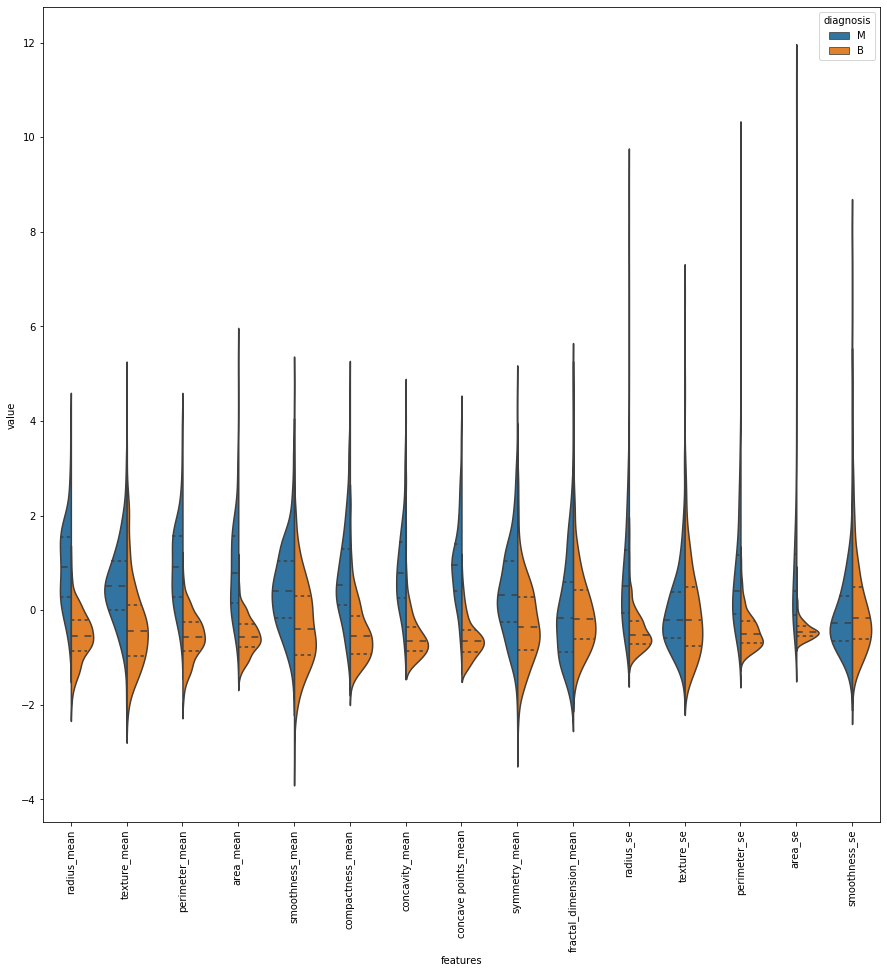

In [17]:
# Plot the violin plot
import seaborn as sns 
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=violin_data_p1,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

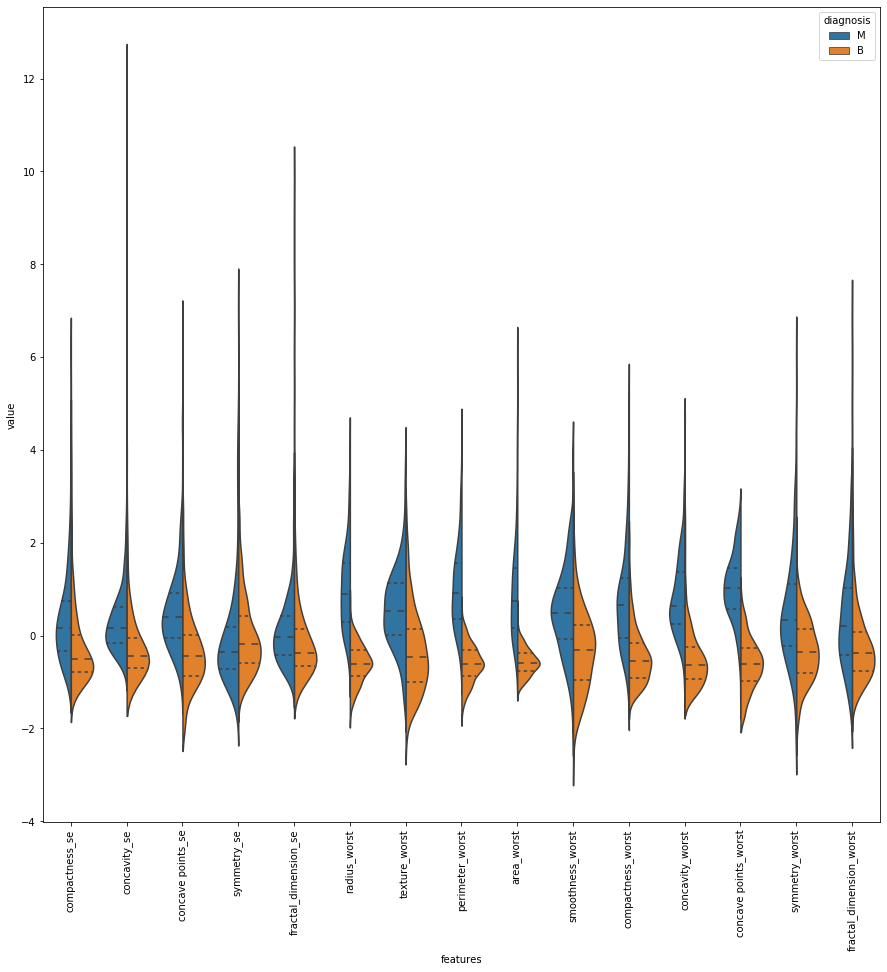

In [18]:
#plot the rest of the data
cl_data_2 = pd.concat([data_diagnosis,scaled_data.iloc[:,15:30]],axis=1)
violin_data_p2 = pd.melt(cl_data_2,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

import seaborn as sns # data visualization library 
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=violin_data_p2,split=True, inner="quart")
plt.xticks(rotation=90)

In [19]:
cl_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Step 3. Feature Engineering

### Step 3a. Heatmap plotted to observe the correlation between parameters 

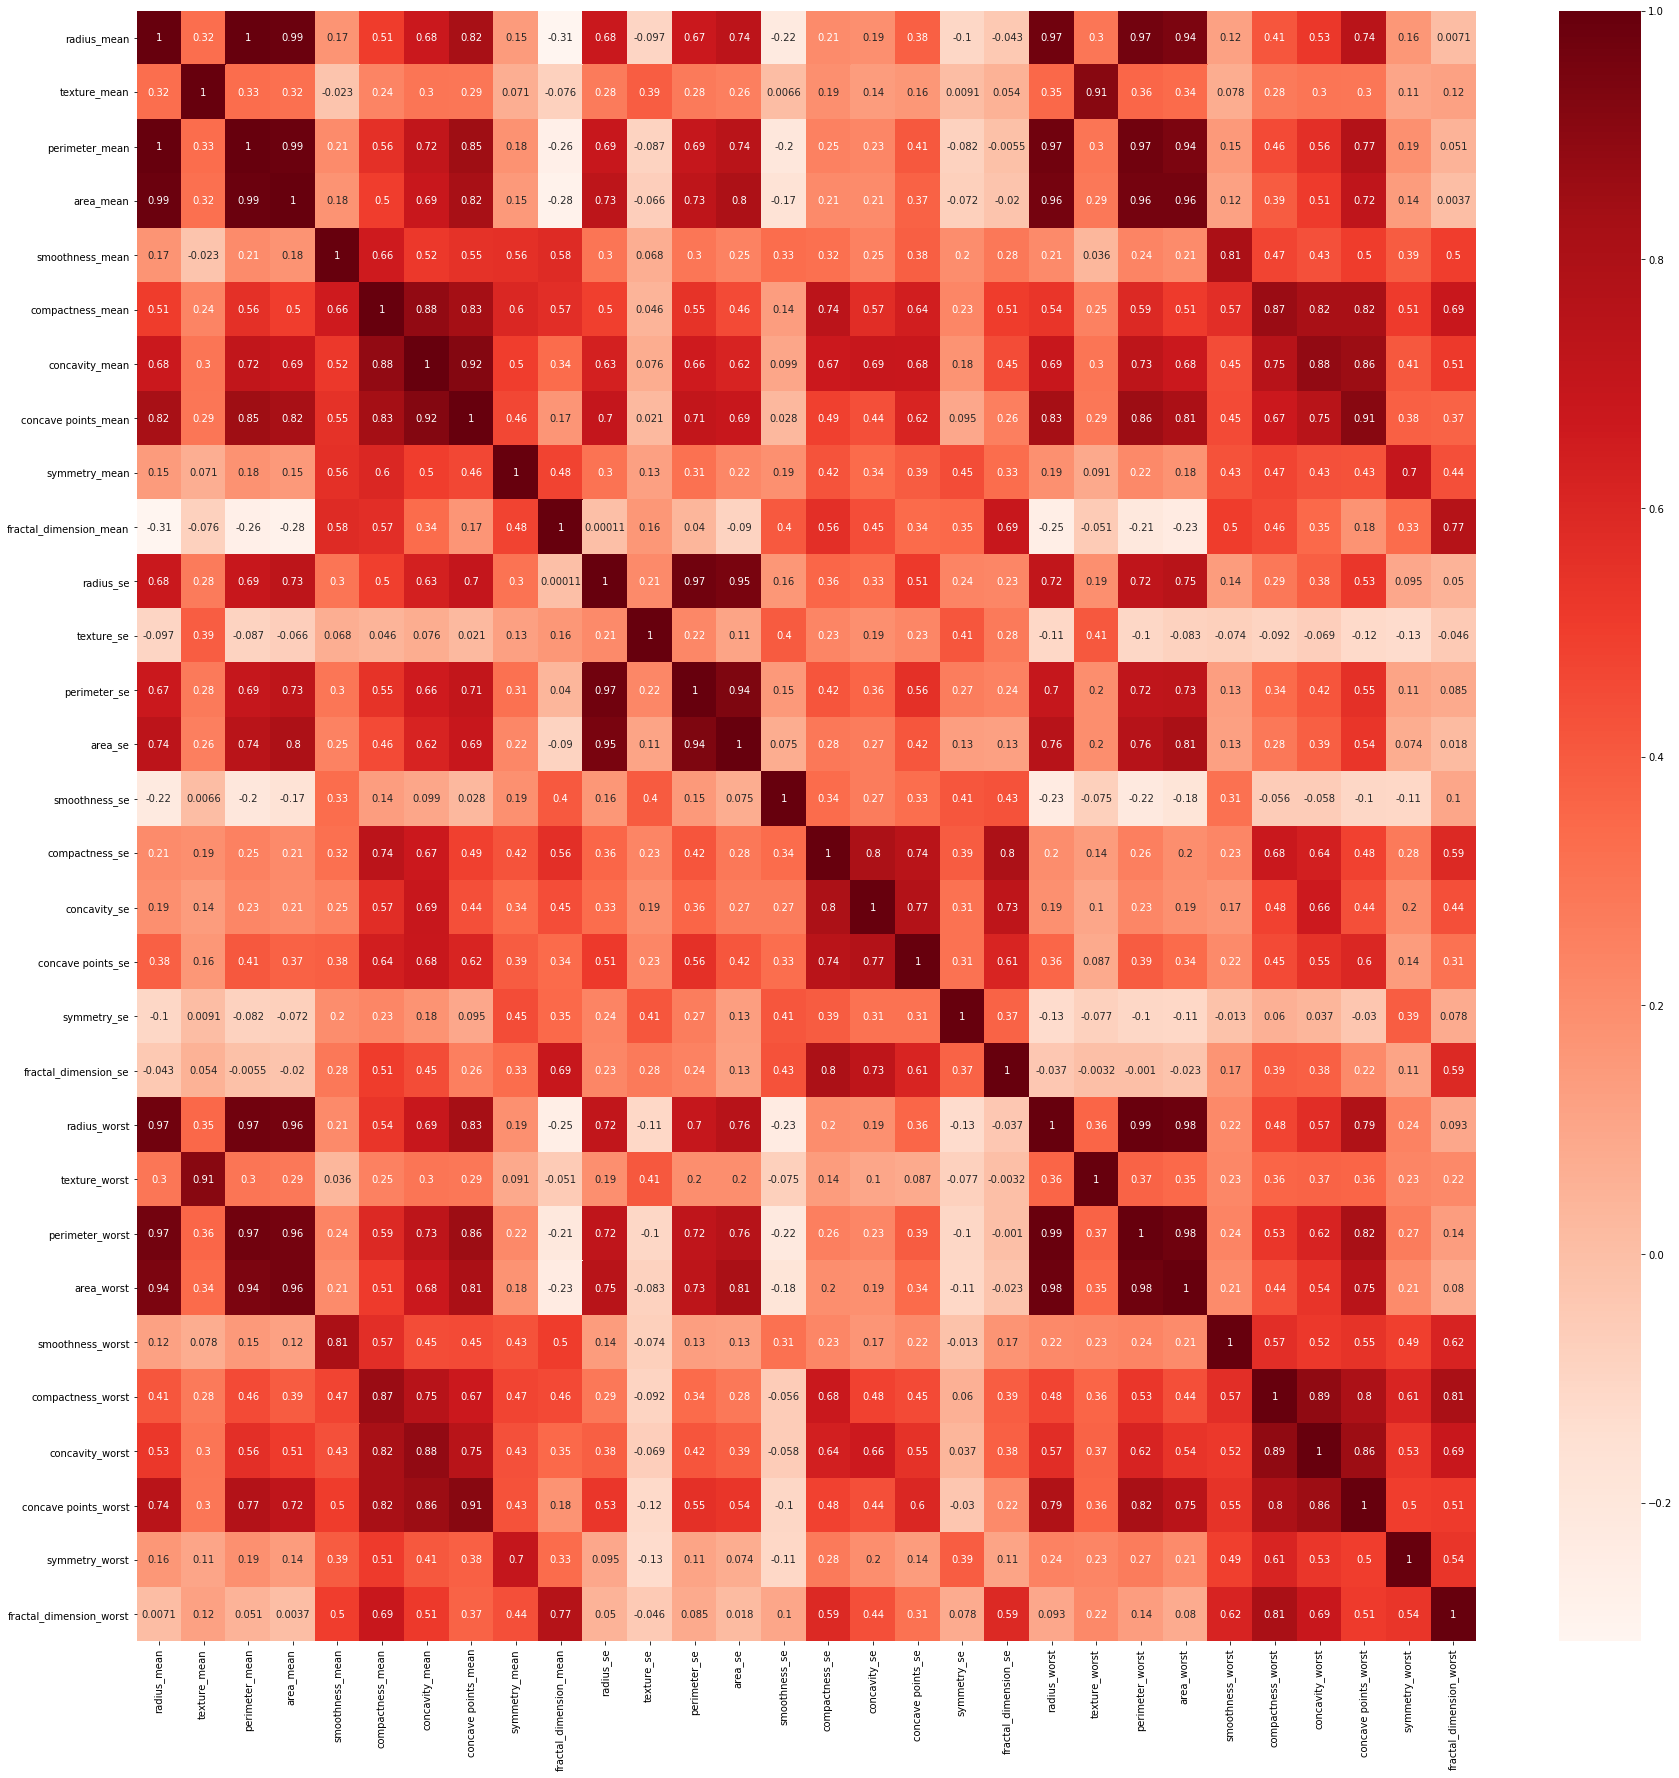

In [20]:
#Using Pearson Correlation
plt.figure(figsize=(30, 30))
cor_data = cl_data.corr()
sns.heatmap(cor_data, annot=True, cmap=plt.cm.Reds)
plt.show()

### Step 3b: A function developed to remove the multicollinear features in given dataset based on the user-defined limit of Pearson's Coefficient

In [21]:
def correlation(data, limit):
    col_corr = list() # List of all the names of deleted columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= limit) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.append(colname)
                if colname in data.columns:
                    del data[colname] # deleting the column from the dataset
    return data

### Step 3c. Removing multicollinearity from the dataset

In [22]:
fin_data=pd.DataFrame()
fin_data=cl_data.copy()
fin_data_cor=correlation(fin_data, 0.80)

In [23]:
# 16 multicollinear features - perimeter mean and area mean (directly correlated with radius mean), concavity mean and etc. removed from the dataset 
fin_data

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.02454,0.01114,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01678,0.01898,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01557,0.01318,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.01664,0.02324,0.4087,0.12400


In [24]:
#original dataset protected (without target variables (lables))
cl_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Application of *Supervised Learning Algorithms* to original dataset (multicollinearity not removed) 

## Step 4. Logistic Regression on Multicollinear Data

### Step 4a. Train-test split of multicollinear dataset

In [25]:
train_data_multic, test_data_multic, train_label_multic, test_label_multic = train_test_split(
    cl_data, data.diagnosis, test_size=1/7.0, random_state=42)

In [26]:
print('Train Data Shape (Multicollinear) :: ',train_data_multic.shape, '\nTest Data Shape (Multicollinear) :: ', test_data_multic.shape)

Train Data Shape (Multicollinear) ::  (487, 30) 
Test Data Shape (Multicollinear) ::  (82, 30)


In [27]:
print('Train Label Shape (Multicollinear) :: ',train_label_multic.shape, '\nTest Label Shape (Multicollinear) :: ', test_label_multic.shape)

Train Label Shape (Multicollinear) ::  (487,) 
Test Label Shape (Multicollinear) ::  (82,)


### Step 4b. Scaling multicollinear dataset

In [28]:
scaler = StandardScaler()
scaler.fit(train_data_multic)
scaled_train_data_multic = scaler.transform(train_data_multic)
scaled_test_data_multic = scaler.transform(test_data_multic)

### Step 4c. Applying Logistic Regression on multicollinear dataset

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg_multic=LogisticRegression(solver ='lbfgs', max_iter=3000).fit(scaled_train_data_multic,train_label_multic)

In [30]:
print('Training Score of Logistic Regression on Multicollinear Dataset :: {}\n'.format(log_reg_multic.score(scaled_train_data_multic, train_label_multic)))
print('Testing Score of Logistic Regression on Multicollinear Dataset :: {}\n'.format(log_reg_multic.score(scaled_test_data_multic, test_label_multic)))

Training Score of Logistic Regression on Multicollinear Dataset :: 0.9876796714579056

Testing Score of Logistic Regression on Multicollinear Dataset :: 0.975609756097561



### Step 4d. Plotting confusion matrix for multicorrelated dataset

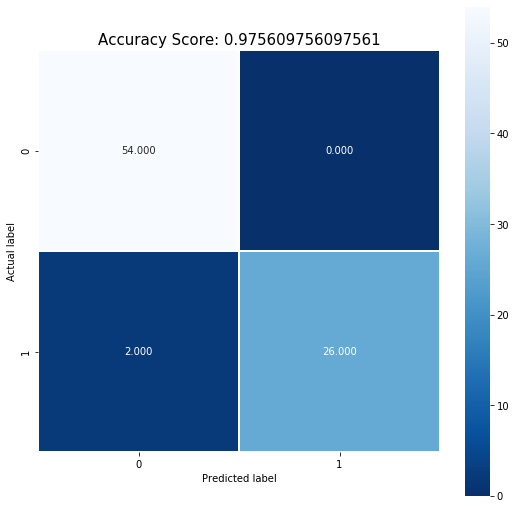

In [31]:
predictions_log_rec_multic = log_reg_multic.predict(scaled_test_data_multic)
cm_log_reg_multic = metrics.confusion_matrix(test_label_multic, predictions_log_rec_multic)

plt.figure(figsize=(9,9))
sns.heatmap(cm_log_reg_multic, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(log_reg_multic.score(scaled_test_data_multic, test_label_multic))
plt.title(all_sample_title, size = 15);
plt.show();

## Step 5. Logistic Regression on Non-Multicollinear Data

### Step 5a. Train-test split of non-multicollinear dataset

In [32]:
train_data_nonmultic, test_data_nonmultic, train_label_nonmultic, test_label_nonmultic = train_test_split(
    fin_data, data.diagnosis, test_size=1/7.0, random_state=122)

In [33]:
print('Train Data Shape (Non-Multicollinear) :: ',train_data_nonmultic.shape, '\nTest Data Shape (Non-Multicollinear) :: ', test_data_nonmultic.shape)
print('Train Label Shape (Non-Multicollinear) :: ',train_label_nonmultic.shape, '\nTest Label Shape (Non-Multicollinear) :: ', test_label_nonmultic.shape)

Train Data Shape (Non-Multicollinear) ::  (487, 14) 
Test Data Shape (Non-Multicollinear) ::  (82, 14)
Train Label Shape (Non-Multicollinear) ::  (487,) 
Test Label Shape (Non-Multicollinear) ::  (82,)


### Step 5b. Scaling non-multicollinear dataset

In [34]:
scaler = StandardScaler()
scaler.fit(train_data_nonmultic)
scaled_train_data_nonmultic = scaler.transform(train_data_nonmultic)
scaled_test_data_nonmultic = scaler.transform(test_data_nonmultic)

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg_nonmultic=LogisticRegression(solver ='lbfgs', max_iter=3000).fit(scaled_train_data_nonmultic,train_label_nonmultic)

### Step 5c. Applying Logistic Regression on non-multicollinear dataset

In [36]:
print('Training Score of Logistic Regression on Multicollinear Dataset :: {}\n'.format(log_reg_nonmultic.score(scaled_train_data_nonmultic, train_label_nonmultic)))
print('Testing Score of Logistic Regression on Multicollinear Dataset :: {}\n'.format(log_reg_nonmultic.score(scaled_test_data_nonmultic, test_label_nonmultic)))

Training Score of Logistic Regression on Multicollinear Dataset :: 0.9691991786447639

Testing Score of Logistic Regression on Multicollinear Dataset :: 0.9512195121951219



### Step 5d. Plotting confusion matrix for non-multicorrelated dataset

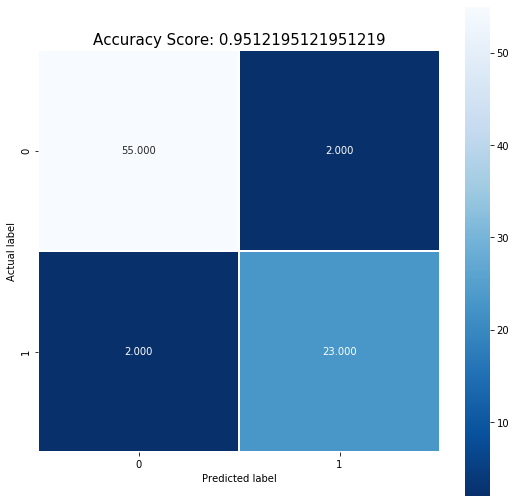

In [37]:
predictions_log_rec_nonmultic = log_reg_nonmultic.predict(scaled_test_data_nonmultic)
cm_log_reg_nonmultic = metrics.confusion_matrix(test_label_nonmultic, predictions_log_rec_nonmultic)

plt.figure(figsize=(9,9))
sns.heatmap(cm_log_reg_nonmultic, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(log_reg_nonmultic.score(scaled_test_data_nonmultic, test_label_nonmultic))
plt.title(all_sample_title, size = 15);
plt.show();

## Step 6. Random Forest on Multicollinear Data

### Step 6a. Train-test split of multicollinear dataset

In [38]:
train_data_multic, test_data_multic, train_label_multic, test_label_multic = train_test_split(
    cl_data, data.diagnosis, test_size=1/7.0, random_state=42)

### Step 6b. Applying Random Forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_multic=RandomForestClassifier()
rf_multic.fit(train_data_multic, train_label_multic)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
print('Training Score of Random Forest Classification on Multicollinear Dataset :: {}\n'.format(rf_multic.score(train_data_multic, train_label_multic)))
print('Testing Score of Random Forest Classification on Multicollinear Dataset :: {}\n'.format(rf_multic.score(test_data_multic, test_label_multic)))

Training Score of Random Forest Classification on Multicollinear Dataset :: 1.0

Testing Score of Random Forest Classification on Multicollinear Dataset :: 0.9634146341463414



### Step 6c. Plotting confusion matrix for multicorrelated dataset

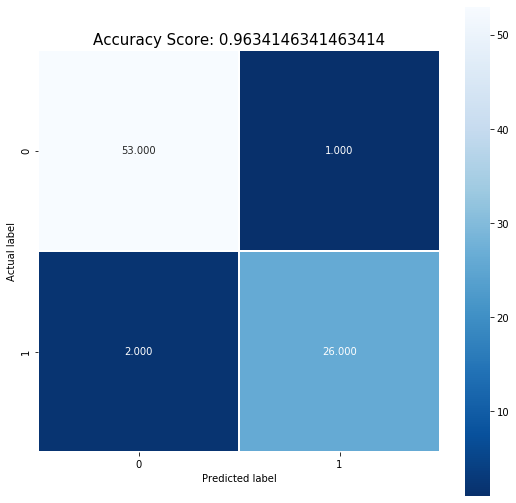

In [41]:
predictions_rf_multic = rf_multic.predict(test_data_multic)
cm_rf_multic = metrics.confusion_matrix(test_label_multic, predictions_rf_multic)

plt.figure(figsize=(9,9))
sns.heatmap(cm_rf_multic, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rf_multic.score(test_data_multic, test_label_multic))
plt.title(all_sample_title, size = 15);
plt.show();

## Step 6d. Visualizing Decision Trees for Multicorrelated Data
### Reference: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [83]:
# Saving feature names for later use
feature_list_multic = list(cl_data.columns)
labels_multic = np.array(data['diagnosis'])
# Convert to numpy array
data_array_multic= np.array(cl_data)

In [86]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree_multic = rf_multic.estimators_[5]

# Export the image to a dot file
export_graphviz(tree_multic, out_file = 'tree_multic.dot', feature_names = feature_list_multic, rounded = True, precision = 1)


# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_multic.dot')

# Write graph to a png file
graph.write_png('tree_multic.png')

#Following code will print out the image in desktop
from PIL import Image
image = Image.open("tree_multic.png")
image.show()

## Step 7. Random Forest on Non-Multicollinear Data

### Step 7a. Train-test split of non-multicollinear dataset

In [44]:
train_data_nonmultic, test_data_nonmultic, train_label_nonmultic, test_label_nonmultic = train_test_split(
    fin_data, data.diagnosis, test_size=1/7.0, random_state=122)

### Step 7b. Applying Random Forest Classification on non-multocollinear dataset

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_nonmultic=RandomForestClassifier()
rf_nonmultic.fit(train_data_nonmultic, train_label_nonmultic)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
print('Training Score of Random Forest Classification on Non-Multicollinear Dataset :: {}\n'.format(rf_nonmultic.score(train_data_nonmultic, train_label_nonmultic)))
print('Testing Score of Random Forest Classification on Non-Multicollinear Dataset :: {}\n'.format(rf_nonmultic.score(test_data_nonmultic, test_label_nonmultic)))

Training Score of Random Forest Classification on Non-Multicollinear Dataset :: 1.0

Testing Score of Random Forest Classification on Non-Multicollinear Dataset :: 0.9390243902439024



### Step 7c. Plotting confusion matrix for non-multicorrelated dataset

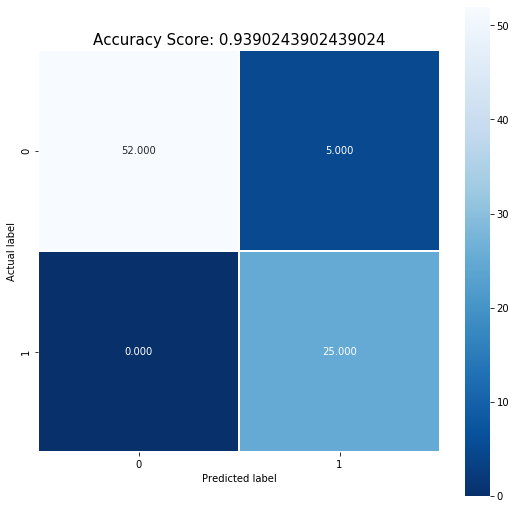

In [47]:
predictions_rf_nonmultic = rf_nonmultic.predict(test_data_nonmultic)
cm_rf_nonmultic = metrics.confusion_matrix(test_label_nonmultic, predictions_rf_nonmultic)

plt.figure(figsize=(9,9))
sns.heatmap(cm_rf_nonmultic, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rf_nonmultic.score(test_data_nonmultic, test_label_nonmultic))
plt.title(all_sample_title, size = 15);
plt.show();

## Step 7d. Visualizing Decision Trees for Non-Multicorrelated Data
### Reference: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [88]:
# Saving feature names for later use
feature_list_nonmultic = list(fin_data.columns)
labels_nonmultic = np.array(data['diagnosis'])
# Convert to numpy array
data_array_nonmultic= np.array(fin_data)

In [101]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree_nonmultic = rf_nonmultic.estimators_[3]

# Export the image to a dot file
export_graphviz(tree_nonmultic, out_file = 'tree_nonmultic.dot', feature_names = feature_list_nonmultic, rounded = True, precision = 1)


# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_nonmultic.dot')

# Write graph to a png file
graph.write_png('tree_nonmultic.png')

#Following code will print out the image in desktop
from PIL import Image
image = Image.open("tree_nonmultic.png")
image.show()

## Step 8. Naive Bayes Classifier on Multicollinear Data

### Step 8a. Train-test split of multicollinear dataset

In [48]:
train_data_multic, test_data_multic, train_label_multic, test_label_multic = train_test_split(
    cl_data, data.diagnosis, test_size=1/7.0, random_state=42)

### Step 8b. Applying Naive Bayes Classifier on multocollinear dataset

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb_multic = GaussianNB()
gnb_multic.fit(train_data_multic, train_label_multic)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
print('Training Score of Naive Bayes Classifier on Multicollinear Dataset :: {}\n'.format(gnb_multic.score(train_data_multic, train_label_multic)))
print('Testing Score of Naive Bayes Classifier on Multicollinear Dataset :: {}\n'.format(gnb_multic.score(test_data_multic, test_label_multic)))

Training Score of Naive Bayes Classifier on Multicollinear Dataset :: 0.9363449691991786

Testing Score of Naive Bayes Classifier on Multicollinear Dataset :: 0.9634146341463414



### Step 8c. Plotting confusion matrix for multicorrelated dataset

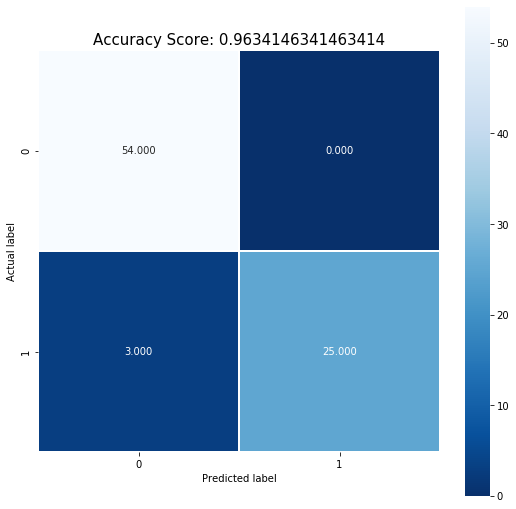

In [51]:
predictions_gnb_multic = gnb_multic.predict(test_data_multic)
cm_gnb_multic = metrics.confusion_matrix(test_label_multic, predictions_gnb_multic)

plt.figure(figsize=(9,9))
sns.heatmap(cm_gnb_multic, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(gnb_multic.score(test_data_multic, test_label_multic))
plt.title(all_sample_title, size = 15);
plt.show();

## Step 9. Naive Bayes Classifier on Non-Multicollinear Data

### Step 9a. Train-test split of non-multicollinear dataset

In [52]:
train_data_nonmultic, test_data_nonmultic, train_label_nonmultic, test_label_nonmultic = train_test_split(
    fin_data, data.diagnosis, test_size=1/7.0, random_state=122)

### Step 9b. Applying Naive Bayes Classifier on non-multocollinear dataset

In [53]:
from sklearn.naive_bayes import GaussianNB
gnb_nonmultic = GaussianNB()
gnb_nonmultic.fit(train_data_nonmultic, train_label_nonmultic)

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
print('Training Score of Naive Bayes Classifier on Non-Multicollinear Dataset :: {}\n'.format(gnb_nonmultic.score(train_data_nonmultic, train_label_nonmultic)))
print('Testing Score of Naive Bayes Classifier on Non-Multicollinear Dataset :: {}\n'.format(gnb_nonmultic.score(test_data_nonmultic, test_label_nonmultic)))

Training Score of Naive Bayes Classifier on Non-Multicollinear Dataset :: 0.8973305954825462

Testing Score of Naive Bayes Classifier on Non-Multicollinear Dataset :: 0.8902439024390244



### Step 9c. Plotting confusion matrix for non-multicorrelated dataset

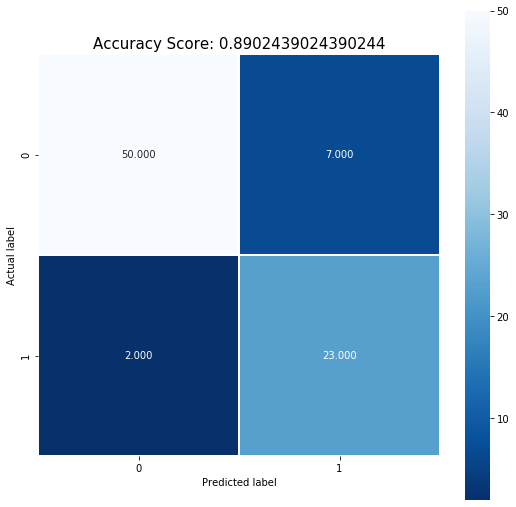

In [55]:
predictions_gnb_nonmultic = gnb_nonmultic.predict(test_data_nonmultic)
cm_gnb_nonmultic = metrics.confusion_matrix(test_label_nonmultic, predictions_gnb_nonmultic)

plt.figure(figsize=(9,9))
sns.heatmap(cm_gnb_nonmultic, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(gnb_nonmultic.score(test_data_nonmultic, test_label_nonmultic))
plt.title(all_sample_title, size = 15);
plt.show();

## Step 10. k-Nearest Neighbor Classifier on Multicollinear Data

### Step 10a. Train-test split of multicollinear dataset

In [56]:
train_data_multic, test_data_multic, train_label_multic, test_label_multic = train_test_split(
    cl_data, data.diagnosis, test_size=1/7.0, random_state=42)

In [57]:
scaler = StandardScaler()
scaler.fit(train_data_multic)
scaled_train_data_multic = scaler.transform(train_data_multic)
scaled_test_data_multic = scaler.transform(test_data_multic)

### Step 10b. Finding the optimal k value for multicollinear dataset
### Reference: https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7#:~:text=Elbow%20Method%20in%20Supervised%20Machine%20Learning(Optimal%20K%20Value),-Moussa%20Doumbia&text=Elbow%20method%20helps%20data%20scientists,this%20optimal%20value%20of%20K.

In [92]:
error_rate = []

for i in range(1,40):
    knn_multic = KNeighborsClassifier(n_neighbors=i)
    knn_multic.fit(scaled_train_data_multic,train_label_multic)
    pred_i = knn_multic.predict(scaled_test_data_multic)
    error_rate.append(np.mean(pred_i != test_label_multic))

(0, 0.2)

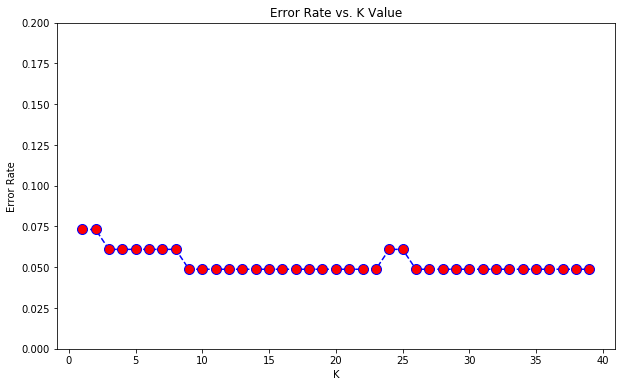

In [98]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.ylim(0,0.2)

### Step 10c. Applying k-Nearest Neighbor Classifier on multicollinear dataset

In [103]:
#To reduce the risk of overfitting and to optimize the classifier, the optimal k value is determined to be 7
from sklearn.neighbors import KNeighborsClassifier
knn_multic_real = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
knn_multic_real.fit(scaled_train_data_multic, train_label_multic)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [104]:
print('Training Score of k-Nearest Neighbor Classifier on Multicollinear Dataset :: {}\n'.format(knn_multic_real.score(scaled_train_data_multic, train_label_multic)))
print('Testing Score of k-Nearest Neighbor Classifier on Multicollinear Dataset :: {}\n'.format(knn_multic_real.score(scaled_test_data_multic, test_label_multic)))

Training Score of k-Nearest Neighbor Classifier on Multicollinear Dataset :: 0.971252566735113

Testing Score of k-Nearest Neighbor Classifier on Multicollinear Dataset :: 0.9512195121951219



### Step 10d. Plotting confusion matrix for multicorrelated dataset

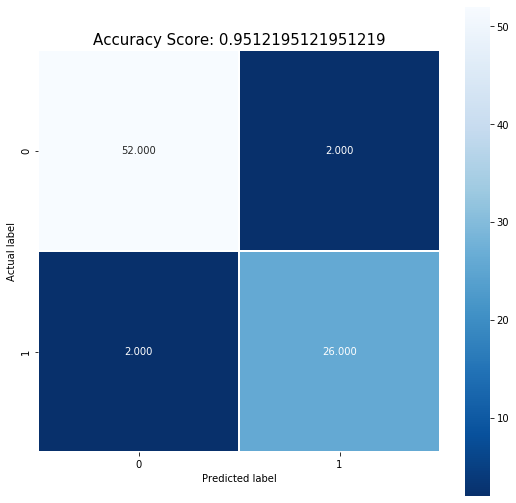

In [105]:
predictions_knn_multic_real = knn_multic_real.predict(scaled_test_data_multic)
cm_knn_multic_real = metrics.confusion_matrix(test_label_multic, predictions_knn_multic)

plt.figure(figsize=(9,9))
sns.heatmap(cm_knn_multic_real, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn_multic_real.score(scaled_test_data_multic, test_label_multic))
plt.title(all_sample_title, size = 15);
plt.show();

## Step 11. k-Nearest Neighbor Classifier on Non-Multicollinear Data

### Step 11a. Train-test split of non-multicollinear dataset

In [107]:
train_data_nonmultic, test_data_nonmultic, train_label_nonmultic, test_label_nonmultic = train_test_split(
    fin_data, data.diagnosis, test_size=1/7.0, random_state=122)

In [108]:
scaler = StandardScaler()
scaler.fit(train_data_nonmultic)
scaled_train_data_nonmultic = scaler.transform(train_data_nonmultic)
scaled_test_data_nonmultic = scaler.transform(test_data_nonmultic)

### Step 11b. Finding the optimal k value for multicollinear dataset
### Reference: https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7#:~:text=Elbow%20Method%20in%20Supervised%20Machine%20Learning(Optimal%20K%20Value),-Moussa%20Doumbia&text=Elbow%20method%20helps%20data%20scientists,this%20optimal%20value%20of%20K.

In [113]:
error_rate_nonmultic = []

for i in range(1,40):
    knn_nonmultic = KNeighborsClassifier(n_neighbors=i)
    knn_nonmultic.fit(scaled_train_data_nonmultic,train_label_nonmultic)
    pred_i = knn_nonmultic.predict(scaled_test_data_nonmultic)
    error_rate_nonmultic.append(np.mean(pred_i != test_label_nonmultic))

Text(0, 0.5, 'Error Rate')

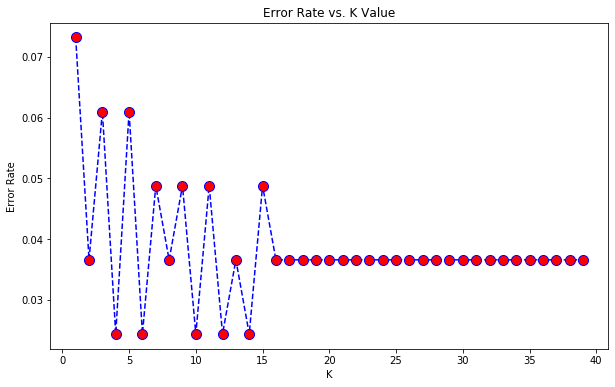

In [114]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate_nonmultic,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Step 11b. Applying k-Nearest Neighbor Classifier on non-multocollinear dataset

In [119]:
#To reduce the risk of overfitting and to optimize the classifier, the optimal k value is determined to be 6
from sklearn.neighbors import KNeighborsClassifier
knn_nonmultic_real = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
knn_nonmultic_real.fit(scaled_train_data_nonmultic, train_label_nonmultic)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [120]:
print('Training Score of k-Nearest Neighbor Classifier on Non-Multicollinear Dataset :: {}\n'.format(knn_nonmultic_real.score(scaled_train_data_nonmultic, train_label_nonmultic)))
print('Testing Score of k-Nearest Neighbor Classifier on Non-Multicollinear Dataset :: {}\n'.format(knn_nonmultic_real.score(scaled_test_data_nonmultic, test_label_nonmultic)))

Training Score of k-Nearest Neighbor Classifier on Non-Multicollinear Dataset :: 0.9486652977412731

Testing Score of k-Nearest Neighbor Classifier on Non-Multicollinear Dataset :: 0.975609756097561



### Step 11c. Plotting confusion matrix for non-multicorrelated dataset

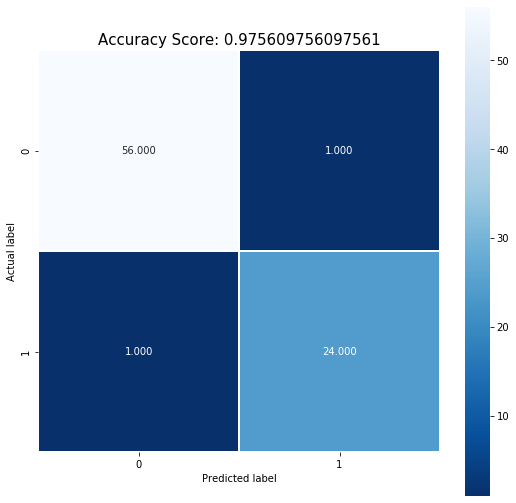

In [122]:
predictions_knn_nonmultic = knn_nonmultic_real.predict(scaled_test_data_nonmultic)
cm_knn_nonmultic = metrics.confusion_matrix(test_label_nonmultic, predictions_knn_nonmultic)

plt.figure(figsize=(9,9))
sns.heatmap(cm_knn_nonmultic, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn_nonmultic_real.score(scaled_test_data_nonmultic, test_label_nonmultic))
plt.title(all_sample_title, size = 15);
plt.show();